In [1]:
import gym
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def displayImage(image, step, reward):
    plt.title(f"step {step} reward {reward:0.1f}")
    plt.imshow(image)
    plt.show()
    
keys = {'w': 1, 'd': 4, 'a': 3, 's': 2}

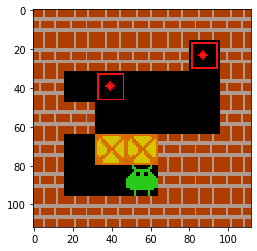

In [3]:
from a_star_search import load_model

model = load_model('DAVI_steps_10_longTraining_no_batchnorm.pth')
env = gym.make('Sokoban-small-v0')  # or 'Sokoban-small-v1'
plt.imshow(env.render('rgb_array'))
plt.show()

In [4]:
from a_star_search import search_way
from gym_sokoban.envs import ACTION_LOOKUP

result, explored_len = search_way(env, model)
if type(result) is list and len(result) > 0:
    print(f'total of {len(result)} steps ({len(result) / float(explored_len) * 100:0.5f}% of explored steps)')
    print(f'explored {len(result) / float((sum((env.room_state > 0).flatten())-3)**3) * 100:0.5f}% of all possible states')
    for action_idx in result:
        print(ACTION_LOOKUP[action_idx])
else:
    print('ERROR, could not find a path 😢')

total of 17 steps (3.24427% of explored steps)
explored 0.77378% of all possible states
push up
push up
push left
push up
push right
push right
push down
push right
push up
push left
push down
push left
push down
push down
push left
push up
push up


In [5]:
INTERACTIVE = False

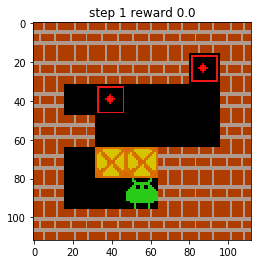

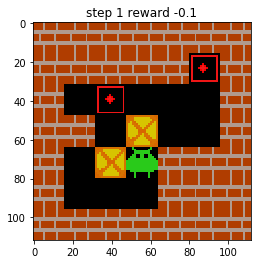

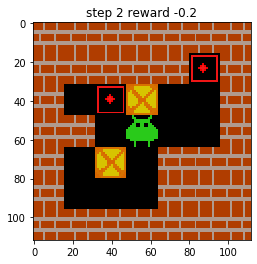

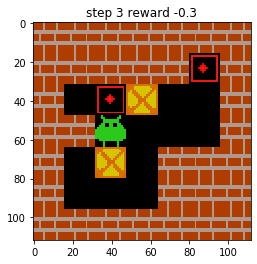

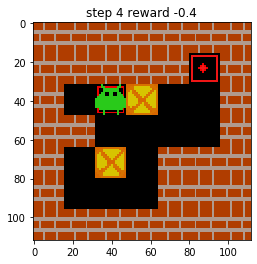

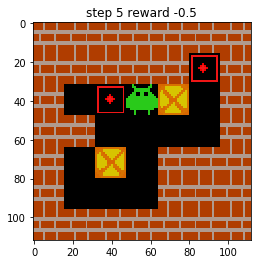

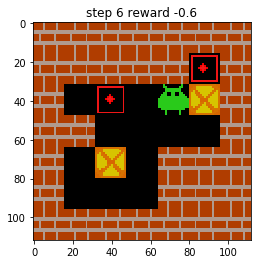

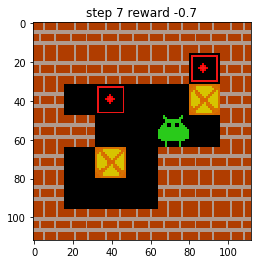

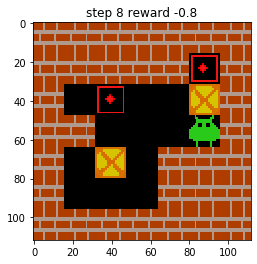

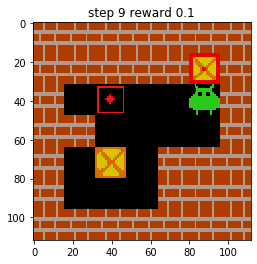

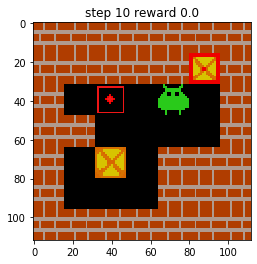

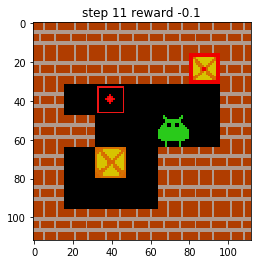

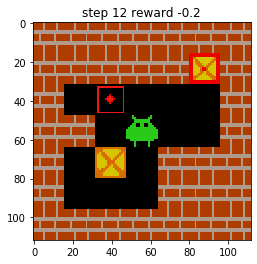

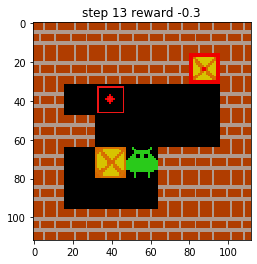

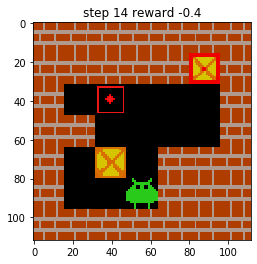

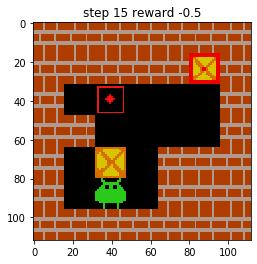

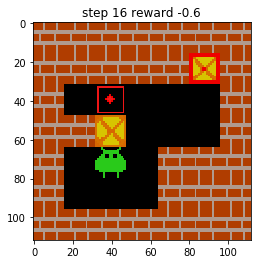

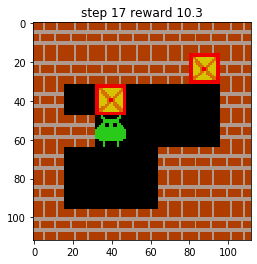

In [6]:
from IPython.display import clear_output

done = False

total_reward = 0
step = 1

displayImage(env.render('rgb_array'), step, total_reward)

while not done:
    if INTERACTIVE:
        x = input()
        clear_output()
        try:
            keys[x]
        except:
            print("Only 'w' 'a' 's' 'd'")
            continue
        action = keys[x]
    else:
        action = result[step - 1]
    
    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    displayImage(next_state, step, total_reward)
    step += 1